## Aneks preprocessing

In [12]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

aneks = pd.read_csv('../data/aneks/raw/anekdotovru.csv')
aneks2 = pd.read_csv('../data/aneks/raw/anekdotovru2.csv')
aneks3 = pd.read_csv('../data/aneks/raw/anekdotovru3.csv')
aneks4 = pd.read_csv('../data/aneks/raw/anekdotovru4.csv')
aneks5 = pd.read_csv('../data/aneks/raw/anekdotovru5.csv')
aneks6 = pd.read_csv('../data/aneks/raw/anekdotovru6.csv')
aneks7 = pd.read_csv('../data/aneks/raw/anekdotovru7.csv')
aneks8 = pd.read_csv('../data/aneks/raw/anekdotovru8.csv')
aneks9 = pd.read_csv('../data/aneks/raw/anekdotovru9.csv')
aneks10 = pd.read_csv('../data/aneks/raw/anekdotov_net.csv')['anek']
aneks11 = pd.read_csv('../data/aneks/raw/anekdotov_net2.csv')['anek']
aneks12 = pd.read_csv('../data/aneks/raw/anekdotov_net_microrofls.csv')['anek']

total = pd.concat([aneks, aneks2, aneks3, aneks4, aneks5, aneks6, aneks7, aneks8, aneks9,
                   aneks10, aneks11, aneks12], axis=0)


total = total.drop_duplicates('anek')

In [13]:
total['ln'] = total.anek.apply(lambda x: len(x.split()))

<Axes: xlabel='ln', ylabel='Count'>

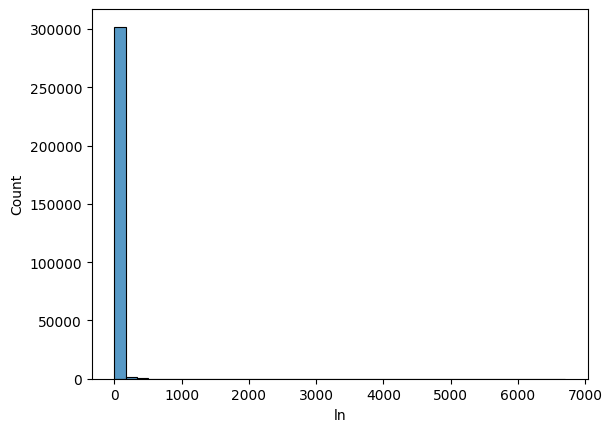

In [14]:
sns.histplot(total, x='ln', bins=40)

In [15]:
total.ln.sort_values(ascending=False)[:10]

5770     6706
51035    3947
16794    2436
20842    2108
32861    1865
11568    1863
67341    1855
33706    1489
32967    1448
54992    1249
Name: ln, dtype: int64

In [16]:
total[total.ln>300].shape

(568, 2)

In [17]:
total = total[total.ln < 300]

In [18]:
total = total['anek'].apply(lambda x: x.lower())

In [19]:
total = total.reset_index(drop=True)
total.to_json(r'D:/workspace/projects/anek/data/aneks/processed/aneks.json')

In [20]:
train, test = train_test_split(total, train_size=0.9)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [21]:
train.to_json(r'D:/workspace/projects/anek/data/aneks/processed/train.json')
test.to_json(r'D:/workspace/projects/anek/data/aneks/processed/test.json')

In [22]:
len(total)

303727

## Vocab preprocessing

In [6]:
import json

tokens = {}
embeddings = {}
with open('../data/vocab/raw/bpe.txt', 'r', encoding='utf-8') as f:
    for idx, line in enumerate(f):
        token, values = line.split(' ', maxsplit=1)
        tokens[token] = idx
        embeddings[idx] = list(map(float,values.split()))

with open('../data/vocab/processed/word2idx.json', 'w') as fp:
    json.dump(tokens, fp)

with open('../data/vocab/processed/idx2embedding.json', 'w') as fp:
    json.dump(embeddings, fp)